### Importing Necessary Libraries

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Loading Data

In [3]:
data = pd.read_csv("data/linear.csv")
data.head()

,x,y
0,0.000000,-51.000000
1,25.000000,-12.000000
2,117.583220,134.907414
3,108.922466,134.085180
4,69.887445,NaN


### Removing Missing or Impute Values

In [4]:
data.shape

(102, 2)

In [5]:
data.isnull().sum()

x    0
y    8
dtype: int64

In [6]:
data = data.dropna(how = "any")

In [7]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [8]:
data.shape

(94, 2)

### Arranging Data into Features Matrix and Target Vector

In [9]:
#Convert x column to numpy array
X = data.loc[:, ['x']].values

In [10]:
X.shape

(94, 1)

In [11]:
y = data.loc[:, 'y'].values

In [22]:
y.shape

(94,)

### Split the dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [24]:
print(X_train.shape, y_test.shape)

(70, 1) (24,)


### Linear Regression

In [13]:
reg = LinearRegression(fit_intercept = True)

In [14]:
#Train the model
reg.fit(X_train,y_train)

LinearRegression()

In [15]:
#Predict value for one input. Inputs need to be two dimensional so use reshape to transform them
reg.predict(X[0].reshape(-1,1))

array([-50.99119328])

In [16]:
##Predict value for multiple inputs
reg.predict(X[0:10])

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

### Measuring Model Performance

In [26]:
score = reg.score(X_test,y_test)
print(score)

0.9787274526895331


### The Equation of the Line for the Regression

In [18]:
w = reg.coef_[0]
b = reg.intercept_

print(f"Formula : y = {w:.2f}x {b:.2f}")

Formula : y = 1.58x -50.99


### Plotting the Best Fit Linear Regression Line in Red

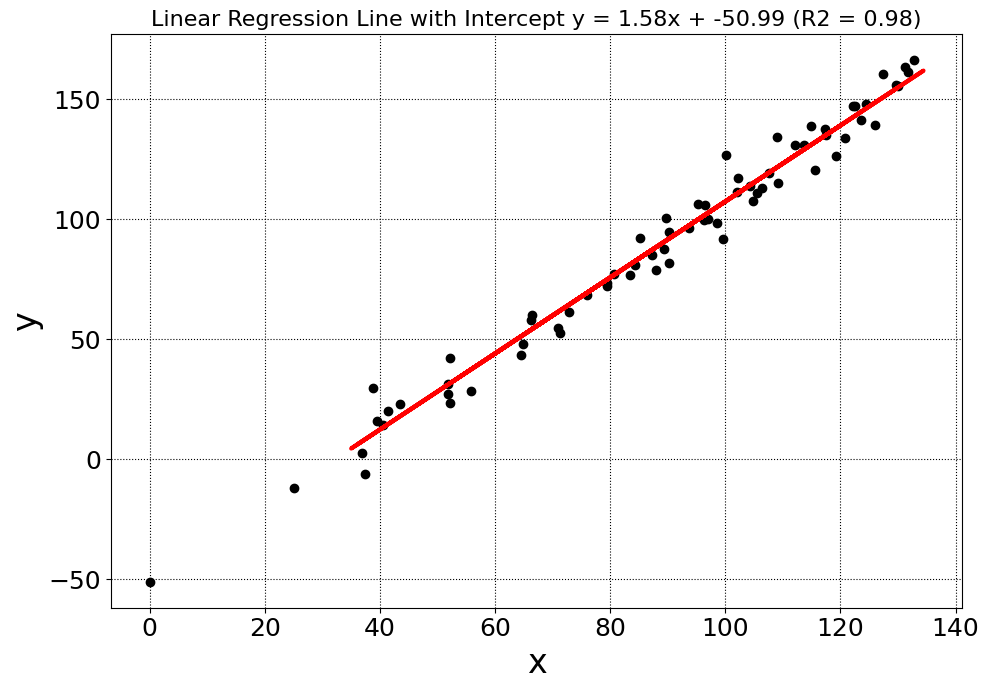

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X_train, y_train, color='black');
ax.plot(X_test, reg.predict(X_test), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize = 24)
ax.set_ylabel('y', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(w, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

### Plotting Models With or Without Intercept

In [32]:
reg_inter = LinearRegression(fit_intercept = True)
reg_inter.fit(X_train,y_train)
prediction_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X_test,y_test)

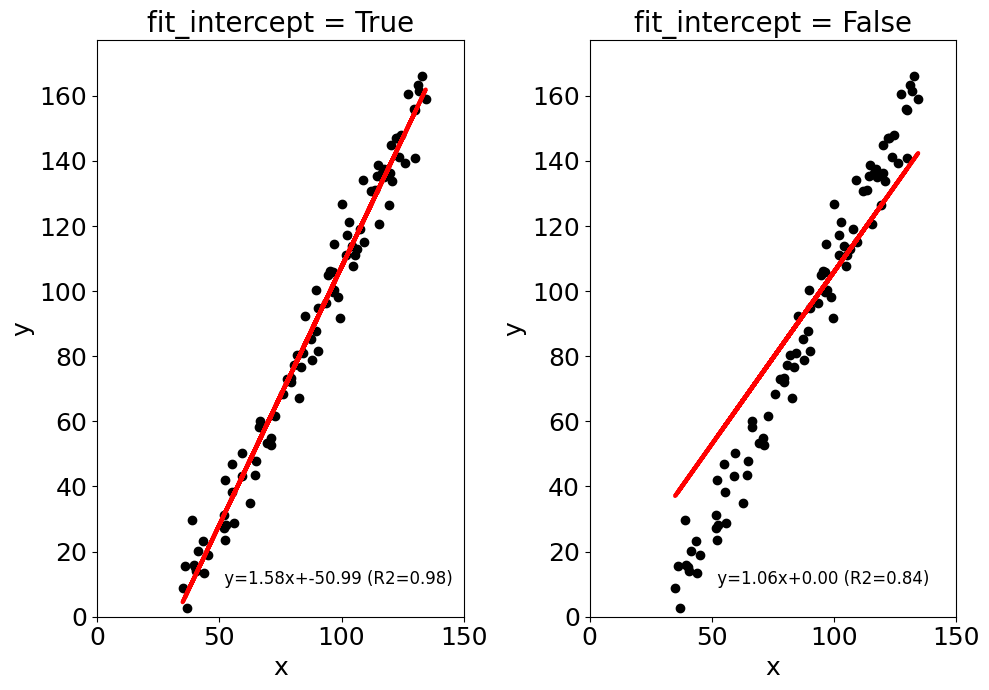

In [33]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X_test)
    score = model.score(X_test, y_test)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X_test, model.predict(X_test), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    ax[index].set_xlim(left = 0, right = 150)
    ax[index].set_ylim(bottom = 0)
    
    ax[index].text(50, 10, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()